<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오
- 럭키백 성공으로 인해서 각각의 지역에서 수산물을 제공
- 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델 학습하기 위한 훈련데이터 제공
- 하지만, 수산물을 제공한다는 곳이 너무 많아 샘플을 골라내는 일이 너무 힘듬
- 또한, 추가되는 생선에 대한 데이터(샘플)이 없음
- 영업팀에서는 새로운 생선이 도착하는 데로 가능한 즉시 훈련 데이터 제공해야 함 => 점진적 학습

# 점진적 학습
- 당면한 문제 : 훈련데이터가 한번에 준비되지 않아 조금씩 전달됨
- 해결법 1
    - 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매번 다시 훈련
    - 단점 : 시간이 지날수록 데이터가 늘어남 -> 인력추가, 서버증설, 시간적 여유감소 => 지속력이 떨어짐
- 해결법 2
    - 새로운 데이터를 추가할때마다, 이전데이터를 버림
    - 훈련데이터크기를 일정하게 유지하는 방법
    - 단점 : 버려진 데이터에 중요한 데이터가 포함될 경우 예측값에 오류발생
- 해결법 3
    - 훈련한 모델을 버리지 않고 **조금씩 새로운 데이터**를 학습
    - 온라인 학습, 점진적 학습법 이용 -> 확률적 경사 하강법

# 확률적 경사 하강법 p312
- 의미
    - 실제 산에서 내려오는 것처럼 가파른 길을 찾아 천천히 조금씩 내려옴
    
- 해석
    - 확률적 : 무작위, 랜덤(훈련세트에서 랜덤하게 하나의 샘플을 선택)
    - 경사 : 기울기
    - 하강 : 내려가는

- 수행
    - 에포크(epoch) : 훈련세트 안의 샘플을 전부 사용하는 과정(일반적으로 수십, 수백번 이상 수행)
        
        ex) 훈련세트에 10개의 샘플이 있으면 1에포크는 10번반복한 것
    - 에포크를 반복하는 동안, 만족하는 위치까지 계속 내려가지만, 모든 샘플을 다 사용해도 다 내려가지 못하면 처음부터 다시 시작
    - 가장 빠른 길 : 경사가 가장 가파른 길

- 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려감 -> 전체 샘플을 모두 사용할 때까지 진행

<img src = "https://velog.velcdn.com/images/rlwjddl234/post/ea480a68-158d-4a6d-a828-42e4deacd5bd/image.png">

종류
- 확률적 경사하강법 : 한개 꺼내기
- 미니배치 경사하강법 : 여러개씩 꺼내기
- 배치 경사하강법 : 전부다 꺼내기

- 한계
    - 샘플 한개를 이용하면 너무 무책임하게 내려갈 수도 있음(중료데이터가 제거될경우)

    - 잘못된 훈련으로 결과가 나오면 돌아갈 수 없음

- 해결법1 : 미니배치경사하강법
    - 무작위로 n개의 샘플을 선택

- 해결법2 : 배치경사하강법
    - 전체 샘플을 사용하여 근단적으로 한번 경사로를 따라 이동
    - 단점 : 컴퓨터 자원은 너무 많이 사용(한번에 전체 데이터를 모두 읽을 수 없을 수도 있음)

- 해결법3 : 확룰적 강사하강법
    - 훈련세트에 있는 샘플 1개씩을 사용하여 조금씩 이동
    - 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 이어나갈수 있음

다시 산꼭대기부터 시작할 필요가 없음 -> 신경망 알고리즘 이용

1. 손실함수(Loss function) : 머신러닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음) -> 이 값을 찾아서 조금씩 이동
2. 비용함수(Cost function) : 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
3. 에포크(epoch : 시대) : 훈련세트를 한번 모두 사용하는 과정

## 데이터준비                                                                                                                 

In [4]:
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## input, target

In [9]:
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [16]:
import numpy as np
np.set_printoptions(precision=6, suppress=True) # 지수를 정수로 변환

print("train_input : ", train_input.shape, " test_input : ", test_input.shape)

print("train_input")
print(train_input[:5])

print("test_input")
print(test_input[:5])

train_input :  (119, 5)  test_input :  (40, 5)
train_input
[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
test_input
[[ 78.      18.7     19.4      5.1992   3.1234]
 [ 13.4     12.4     13.5      2.43     1.269 ]
 [200.      32.3     34.8      5.568    3.3756]
 [270.      26.      28.7      8.3804   4.2476]
 [150.      23.      24.5      5.2185   3.626 ]]


In [19]:
print("train_target : ", train_target.shape, " test_target : ", test_target.shape)

print("train_target")
print(train_target)

print("test_target")
print(test_target)

train_target :  (119,)  test_target :  (40,)
train_target
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' '

## 데이터 전처리

In [21]:
#표준화점수 처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) #훈련 input으로만
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print("train_input")
print(train_scaled[:5])

print("\ntest_input")
print(test_scaled[:5])

train_input
[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]

test_input
[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


## 훈련(SGDClassifier)

In [23]:
# SGDClassifier : 확률적 경사 하강법, 2개의 매개변수 지정
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
# loss = 'log_loss' : 로지스틱 손실 함수 지정
# max_iter = 10 : 10회 에포크 반복(전체 훈련세트 10회 반복)

sc.fit(train_scaled, train_target) #훈련시작

print("train : ", sc.score(train_scaled, train_target))
print("test  : ", sc.score(test_scaled, test_target))
# train(0.773) < test(0.775) => 과소적합
# 원인 : ConvergenceWarning : max_iter의 반복횟수 부족

train :  0.773109243697479
test :  0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<img src = "https://velog.velcdn.com/images/hoonly01/post/ed6ce418-d3aa-48b0-9998-90c2c5bdf907/image.png" width=450px>

## 재훈련(점진적 학습 & 부분적인 학습)
- SGDClassifier 객체를 또 만들지 말고 훈련할 모델을 sc로 추가하여 훈련 추가

In [24]:
# 부분적인(partial) 학습
sc.partial_fit(train_scaled, train_target)

print("train : ", sc.score(train_scaled, train_target))
print("test  : ", sc.score(test_scaled, test_target))
# train(0.798) > test(0.775) => 정확도는 향상됨

train :  0.7983193277310925
test  :  0.775


## 결론
- 퍼센트 변화
    - train : 77.3% -> 79.8% (정확도가 향상되고 있음)
    - test  : 77.5% -> 77.5% (변화x)
- 기존데이터로 반복학습을 한것(= 무작정 부분적인 학습을 계속하는 것)은 의미가 없음-> 기준점을 제공해야함
- 현재 : 등산 내려오다가 정지된 느낌

## 에포크와 과대/과소적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소, 과대접합이 될수 있음
- 에포크(epoch)
    - 적음 : 훈련세트를 덜 학습 ex) 119개에서 10번만 랜덤 추출하고 정지
    - 충분 : 훈련세트를 완전히 학습

<img src ="https://velog.velcdn.com/images/hoonly01/post/eea5f6c7-5cfe-4b72-937b-9604274aef8b/image.png" width = 480px>
<img src = "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjgY7plaCiEMesPJpArEUwGnK7w05uHSaVyK8HozcHx79WyQqau776DXaCimjUuJAvrt9SfwezK-uGgZ8FvcRXunSxFx2JgFCJf-CpV4vCvflTo368Q2nw0lxa0VUVHpZ0OZV9S-TDRw7tC/w640-h274/image.png" width=530px>

- 과소적합의 경우 : 적은 에포크 횟수동안에 훈련된 모델은 훈련세트와 테스트 세트에 맞지 않음
- 과대적합의 경우 : 에프크 횟수가 많은 훈련모델의 경우, 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁨
- 조기종료(tol) : 과대적합이 되기 전에 훈련을 멈추는 것(일정 에포크동안 성능이 항상되지 않으면 자동 멈춤)

## 재훈련(에포크 조정)

In [25]:
import numpy as np

sc = SGDClassifier(loss = "log_loss", random_state=42)

train_score = []    #훈련세트 점수
test_score = []     #테스트세트 점수
#7개의 생선목록 제공(.unique)
classes = np.unique(train_target)

# _ : 1회용변수(임시변수)
for _ in range(0,300): # 에포트 300번진행
    #partial_fit : 훈련을 부분적으로 추가
    sc.partial_fit(train_scaled, train_target, classes = classes)
    #반복하는 동안 점수를 두 배열에 각각 추가
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

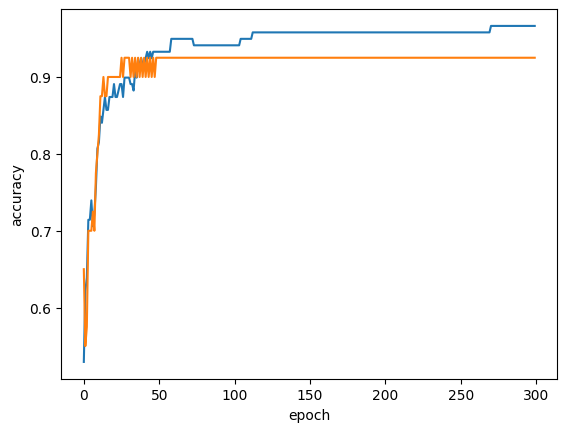

In [35]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")     #에포크
plt.ylabel("accuracy")  #정확도
# plt.xlim(50,120) # 그래프 간격차이가 가장 적은 곳
# plt.ylim(0.9) #0.8이상부터 볼것
plt.show()
#결론 : 에포크 100번정도 돌리니 차크상으로 과대, 과소적합이 아님

In [36]:
sc = SGDClassifier(loss = "log_loss", max_iter = 100, tol = None, random_state=42)
# tol : 조기종료 여부

sc.fit(train_scaled, train_target)

print("train : ", sc.score(train_scaled, train_target))
print("test  : ", sc.score(test_scaled, test_target))
# train(0.958) > test(0.925) => 최적의 상태

train :  0.957983193277311
test  :  0.925


In [38]:
sc.predict(test_scaled[:5])

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [39]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

## [한지손실](https://velog.io/@lee9843/Word2Vec%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%9C-%EB%82%B4%EC%9A%A94-hinge-loss-%ED%9E%8C%EC%A7%80-%EC%86%90%EC%8B%A4)
- loss : 손실함수에 대한 loss 매개값
- 기본값 : loss = 'hinge'(힌지손실)
    - 서포트 백터 머신
    - 또다른 머신러닝 알고리즘을 위한 손실함수
    - margin 안에서 손실을 체크
    [힌지손실]

In [40]:
sc = SGDClassifier(loss = "hinge", max_iter = 100, tol = None, random_state=42)
# tol : 조기종료 여부

sc.fit(train_scaled, train_target)

print("train : ", sc.score(train_scaled, train_target))
print("test  : ", sc.score(test_scaled, test_target))
# 로지스틱  : train(0.958)
# 힌지      : train(0.950) > test(0.925)

train :  0.9495798319327731
test  :  0.925
